<a href="https://colab.research.google.com/github/yoooniverse/NLP/blob/main/EngKorWord2Vec_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gensim 패키지에서 제공하는 이미 구현된 Word2Vec을 사용하여 영어와 한국어 데이터를 학습

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

preprocessing

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fe3c2322e20>)

file is written in XML grammar.

need to delete grammar elements of xml and extract only texts

also need to erase meaningless words

DATA WE ARE NEEDED ARE LOCATED BETWEEN `<content>` and `</content>` 

In [35]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

parse_text = '\n'.join(target_text.xpath('//content/text()'))   #Imports only the content between <content> and </content> from the xml file.

content_text = re.sub(r'\([^)]*\)', '', parse_text)   #Remove words enclosed in parentheses

In [36]:
print(len(content_text))

24062319


In [37]:
content_text = content_text[:9000000]
print(content_text[:1000])

Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.
Consider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.

Facit did too much exploitation. But exploration can go wild, too.
A few years back, I worked closely alongside a European biotech co

In [38]:
sent_text = sent_tokenize(content_text)

In [39]:
normalized_text = []
for string in sent_text:
  tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
  normalized_text.append(tokens)

result = [word_tokenize(sentence) for sentence in normalized_text]

In [40]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 95655


In [41]:
for line in result[:3]:
  print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


train Word2Vec

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram  

In [42]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [43]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9125665426254272), ('girl', 0.8544999361038208), ('guy', 0.8506600260734558), ('boy', 0.8160876035690308), ('lady', 0.788772463798523), ('kid', 0.7846238613128662), ('friend', 0.741062343120575), ('named', 0.7107996940612793), ('child', 0.70794677734375), ('mine', 0.6886680126190186)]


it shows similarity of words between words

In [44]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v")

In [45]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9125665426254272), ('girl', 0.8544999361038208), ('guy', 0.8506600260734558), ('boy', 0.8160876035690308), ('lady', 0.788772463798523), ('kid', 0.7846238613128662), ('friend', 0.741062343120575), ('named', 0.7107996940612793), ('child', 0.70794677734375), ('mine', 0.6886680126190186)]




---



Korean word2vec (NAVER MOVIE REVIEW)

In [48]:
#solution for
#ModuleNotFoundError: No module named 'konlpy'

!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:13 http://ppa.launc

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [50]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fe3bd4807c0>)

In [51]:
train_data = pd.read_table('ratings.txt')

In [52]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [53]:
print(len(train_data))

200000


In [54]:
print(train_data.isnull().values.any())

True


In [56]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [57]:
print(len(train_data))

199992


In [58]:
#if it is not written in Korean, delete them
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

<ipython-input-58-e3e45500bad9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


In [59]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [60]:
#define stopword
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#tokenize
okt = Okt()

In [68]:
from tqdm.notebook import tqdm  #solution for name 'tqdm' is not defined

tokenized_data = []
for sentence in tqdm(train_data['document']):
  tokenized_sentence = okt.morphs(sentence, stem=True)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] #removing stopwords
  tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/199992 [00:00<?, ?it/s]

according to other people, mecab is faster than okt

Okt 형태소 분석기가 너무 느려서 Mecab으로 했는데 꽤 빠르더군요.
전 맥 환경에서 사용 중인데 다음 사이트 참고해서 Mecab으로 돌렸습니다. 
https://buttercoconut.xyz/251/
https://lovablebaby1015.wordpress.com/2018/09/24/mecab-macos-설치-삽질-후기-작성중/ - 상욱, 2020년 8월 16일 1:57 오후
원래 형태소 분석기는 Mecab이 제일 빠릅니다. colab 사용 중이시면 그냥 이 링크따라 하셔도 됩니다.  
https://github.com/SOMJANG/Mecab-ko-for-Google-Colab - 유원준/안상준, 2020년 8월 16일 2:25 오후

max length of review :  72
average length of review :  10.716703668146726


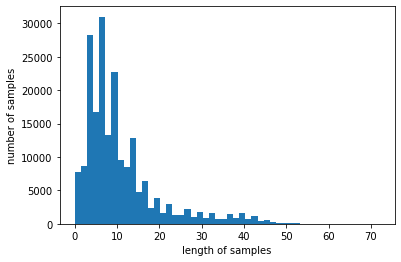

In [72]:
print('max length of review : ', max(len(review) for review in tokenized_data))
print('average length of review : ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [71]:
#how to use map()
print(list(map(len, ['asdfasdf', 'asd'])))

[8, 3]


train movie review data with Word2Vec

In [73]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)

In [74]:
model.wv.vectors.shape

(16477, 100)

총 16,477개의 단어가 존재하며 각 단어는 100차원으로 구성

In [75]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8950208425521851), ('한석규', 0.8945375084877014), ('박중훈', 0.8678207397460938), ('최민수', 0.8532915711402893), ('엄정화', 0.8530787229537964), ('김명민', 0.8493914604187012), ('송강호', 0.8466295599937439), ('설경구', 0.8407623767852783), ('이정재', 0.8389773368835449), ('윤제문', 0.8366096615791321)]


In [76]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8716949224472046), ('느와르', 0.8690763115882874), ('무협', 0.8662411570549011), ('호러', 0.8628234267234802), ('블록버스터', 0.850423276424408), ('무비', 0.8323990702629089), ('스릴러물', 0.8185572624206543), ('정통', 0.8092641830444336), ('물', 0.807519793510437), ('재난영화', 0.8048535585403442)]


Pre-trained Word2Vec embedding

In [80]:
import gensim
import urllib.request


#urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/NLP/GoogleNews-vectors-negative300.bin.gz', binary=True)

(took 40 minutes...)

In [81]:
print(word2vec_model.vectors.shape)

(3000000, 300)


3백만 개의 단어와 각 단어의 차원은 300

3 million words * 300 features * 4bytes/feature = ~3.35GB

In [82]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797034
0.057204384


In [83]:
print(word2vec_model['book'])
#shows 300 values

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

Point: Word2vec 모델은 자연어 처리에서 단어를 밀집 벡터로 만들어주는 단어 임베딩 방법론이지만 최근에 들어서는 자연어 처리를 넘어서 추천 시스템에도 사용되고 있는 모델입니다. 적당하게 데이터를 나열해주면 Word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터를 만들어준다는 점에서 착안된 아이디어